Models:
1. Decision Tree
2. Random forest
3. K-nearest neighbors
4. SVM

1. Decision Tree

In [2]:
# import all the module
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn import tree

In [3]:
# load the dataseet
data1= pd.read_csv('./Decision_Tree_ Dataset.csv')
data1.head()

,1,2,3,4,sum,Result
0,201,10018,250,3046,13515,yes
1,205,10016,395,3044,13660,yes
2,257,10129,109,3251,13746,yes
3,246,10064,324,3137,13771,yes
4,117,10115,496,3094,13822,yes


In [4]:
# split the dataset to train and test
x1 = data1.values[:, 0:3]
y1 = data1['Result']
x1_train, x1_test, y1_train, y1_test = train_test_split(x1, y1, test_size=0.2, random_state=45)


In [5]:
# create a function to perform training with entropy
entropy = DecisionTreeClassifier(criterion="entropy", random_state=45, max_depth=4, min_samples_leaf=5)
entropy.fit(x1_train,y1_train)


DecisionTreeClassifier(criterion='entropy', max_depth=4, min_samples_leaf=5,
                       random_state=45)

In [6]:
# print the accuracy of the model
y1_predict = entropy.predict(x1_test)
accuracy1 = accuracy_score(y1_test, y1_predict)
print(accuracy1)

0.865


2. Random forest

In [7]:
# import all the module
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

In [8]:
# load the dataset
data2 = pd.read_csv('./iris.csv')
print(data2.head())

   Id  SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm      Species
0   1            5.1           3.5            1.4           0.2  Iris-setosa
1   2            4.9           3.0            1.4           0.2  Iris-setosa
2   3            4.7           3.2            1.3           0.2  Iris-setosa
3   4            4.6           3.1            1.5           0.2  Iris-setosa
4   5            5.0           3.6            1.4           0.2  Iris-setosa


In [9]:
# split the data to train and test
# x2 = data2[:, 1:4]
x2 = data2[['SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm']]
y2 = data2['Species']

x2_train, x2_test, y2_train, y2_test = train_test_split(x2, y2, test_size=0.2, random_state=45)

In [10]:
# creat a model
rf_model = RandomForestClassifier(n_jobs=2)
rf_model.fit(x2_train,y2_train)

RandomForestClassifier(n_jobs=2)

In [11]:
# print the accuracy of the model
y2_predict = rf_model.predict(x2_test)
print(y2_predict)
accuracy2 = accuracy_score(y2_test, y2_predict)
print(accuracy2)

['Iris-setosa' 'Iris-setosa' 'Iris-versicolor' 'Iris-setosa' 'Iris-setosa'
 'Iris-setosa' 'Iris-setosa' 'Iris-virginica' 'Iris-virginica'
 'Iris-virginica' 'Iris-setosa' 'Iris-virginica' 'Iris-virginica'
 'Iris-virginica' 'Iris-versicolor' 'Iris-setosa' 'Iris-virginica'
 'Iris-virginica' 'Iris-setosa' 'Iris-versicolor' 'Iris-versicolor'
 'Iris-versicolor' 'Iris-virginica' 'Iris-versicolor' 'Iris-setosa'
 'Iris-virginica' 'Iris-versicolor' 'Iris-versicolor' 'Iris-setosa'
 'Iris-versicolor']
0.9333333333333333


In [12]:
# print the confusion matrix
print(pd.crosstab(y2_test, y2_predict))

col_0            Iris-setosa  Iris-versicolor  Iris-virginica
Species                                                      
Iris-setosa               11                0               0
Iris-versicolor            0                7               0
Iris-virginica             0                2              10


3. K-nearest neighbors

In [13]:
# import all the module
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import f1_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix

In [14]:
# load the dataset
data3 = pd.read_csv('./diabetes.csv')
data3.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [15]:
# replace all the zero with the mean values
zero_not_accepted = ['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI']

for column in zero_not_accepted:
    data3[column] = data3[column].replace(0, np.NaN)
    mean = int(data3[column].mean(skipna=True))
    data3[column] = data3[column].replace(np.NaN, mean)

data3.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148.0,72.0,35.0,155.0,33.6,0.627,50,1
1,1,85.0,66.0,29.0,155.0,26.6,0.351,31,0
2,8,183.0,64.0,29.0,155.0,23.3,0.672,32,1
3,1,89.0,66.0,23.0,94.0,28.1,0.167,21,0
4,0,137.0,40.0,35.0,168.0,43.1,2.288,33,1


In [74]:
# split the data in to test and train
x3 = data3.drop('Outcome', axis=1)
y3 = data3['Outcome']

x3_train, x3_test, y3_train, y3_test = train_test_split(x3, y3, test_size=0.2)

In [89]:
# create a model
knn_model = KNeighborsClassifier(n_neighbors=5, p=2, metric='euclidean', )
for i in range(0,10):
    knn_model.fit(x3_train,y3_train)
knn_model.fit(x3_train,y3_train)

KNeighborsClassifier(metric='euclidean')

In [90]:
# evaluate the model
y3_predict = knn_model.predict(x3_test)
cm1 = confusion_matrix(y3_test, y3_predict)
print(cm1)
accuracy3 = accuracy_score(y3_test, y3_predict)
print(accuracy3)
print(f1_score(y3_test, y3_predict))

[[74 17]
 [34 29]]
0.6688311688311688
0.5321100917431192


4. SVM

In [152]:
# import all the module
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets._samples_generator import make_blobs
from sklearn.model_selection import train_test_split
from sklearn import svm
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import f1_score

In [191]:
# create 40 separable points
x4, y4 = make_blobs(n_samples=40, centers=2, random_state=20)

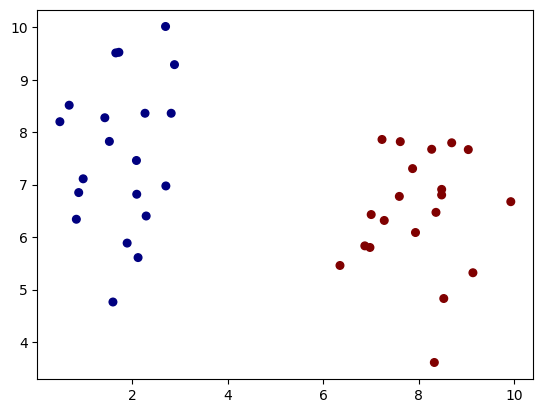

In [192]:
svm_model = svm.SVC(kernel='linear', C=10000)
svm_model.fit(x4, y4)
plt.scatter(x4[:, 0], x4[:, 1], c=y4, s=30, cmap=plt.cm.jet)

In [196]:
newdata4 = [[3, 4], [6, 2]]
print(svm_model.predict(newdata4))

[0 1]


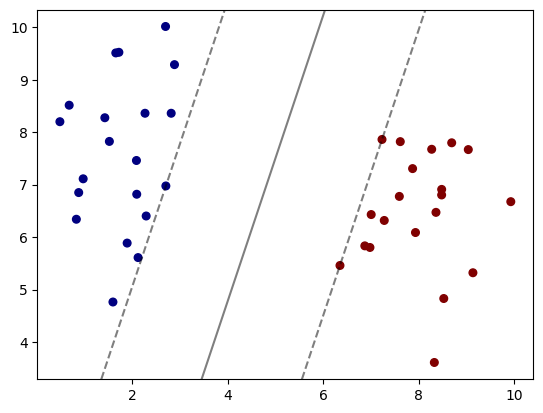

In [203]:
svm_model = svm.SVC(kernel='linear', C=10000)
svm_model.fit(x4, y4)
plt.scatter(x4[:, 0], x4[:, 1], c=y4, s=30, cmap=plt.cm.jet)

# plot the decision function
ax = plt.gca()
xlim = ax.get_xlim()
ylim = ax.get_ylim()

# create grid to evaluate model
xx = np.linspace(xlim[0], xlim[1], 30)
yy = np.linspace(ylim[0], ylim[1], 30)
YY, XX= np.meshgrid(yy, xx)
xy = np.vstack([XX.ravel(), YY.ravel()]).T
Z = svm_model.decision_function(xy).reshape(XX.shape)

# plot decision boundary and margins
ax.contour(XX, YY, Z, colors='k', levels=[-1, 0, 1], alpha=0.5, linestyles=['--', '-', '--'])
# plot support vectors
ax.scatter(svm_model.support_vectors_[:, 0], svm_model.support_vectors_[:, 1], s=100, linewidth=1, facecolors='none')
plt.show()